<a href="https://colab.research.google.com/github/BHashemi2021/All-Stock-Analysis/blob/main/Demo_Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The use-case: **

A 73-year-old female came to the hospital after being discharged 4 days ago complaining of shortness of breath, chest pain and high fever. Patient was prescribed Nifedipine 60 mg OD Oral, Furosemide 40 mg TID IV Aspirin 81 mg OD Oral, and Metolazone 2.5 mg OD Oral Atrovastatin 40 mg OD Oral. Telmisartan 40 mg OD Oral and Carvedilol 6.25 mg BID Oral Enoxaparin 3000 IU OD S.C Nitroglycerin 5 mcg/min OD IV.

Radiology report was requested and images are attached. 

**Diagnosis:** Atelectasis and Effusion.



---

# Identification and extraction of medication information from medical notes
use [Med7](https://github.com/kormilitzin/med7) for inference

In [ ]:
!pip install spacy==2.3.5

In [ ]:
pip install https://med7.s3.eu-west-2.amazonaws.com/en_core_med7_lg.tar.gz

tcmalloc: large alloc 1116061696 bytes == 0x55fe1cce2000 @  0x7f9977db5615 0x55fde5456cdc 0x55fde553652a 0x55fde5459afd 0x55fde554afed 0x55fde54cd988 0x55fde54c84ae 0x55fde545b3ea 0x55fde54c960e 0x55fde54c84ae 0x55fde545b3ea 0x55fde54c960e 0x55fde54c84ae 0x55fde545b3ea 0x55fde54c960e 0x55fde54c84ae 0x55fde545b3ea 0x55fde54c960e 0x55fde54c84ae 0x55fde545b3ea 0x55fde54c960e 0x55fde545b30a 0x55fde54c960e 0x55fde54c84ae 0x55fde545b3ea 0x55fde54ca32a 0x55fde54c84ae 0x55fde545b3ea 0x55fde54c960e 0x55fde54c87ad 0x55fde545b3ea
  Using cached https://med7.s3.eu-west-2.amazonaws.com/en_core_med7_lg.tar.gz
  Created wheel for en-core-med7-lg: filename=en_core_med7_lg-0.0.3-cp37-none-any.whl size=893633388 sha256=4b6a986db2aa1f41a0abdb82914ae6e374f8895ae9a103b6d111e3c1fe627ed2
  Stored in directory: /tmp/pip-ephem-wheel-cache-5fv8dr12/wheels/e8/03/60/ef9792d3323ee6e601bd424db4b2cf2fdc90788c73f902d6bf
Successfully built en-core-med7-lg


In [ ]:
import spacy
import en_core_med7_lg
med7 = en_core_med7_lg.load()
print ('successfully imported')

successfully imported


In [ ]:
# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

In [ ]:
text = 'Patient was prescribed TAB RABEPRAZOLE 40 mg once daily, Nifedipine 60 mg qd Oral, Furosemide 40 mg TID IV Aspirin 81 mg qd Oral, and Metolazone 2.5 mg bid Oral Atrovastatin 40 mg QD Oral. Telmisartan 40 mg QD Oral plus Carvedilol 6.25 mg BID Oral and Enoxaparin 3000 IU qd S.C Nitroglycerin 5 mcg OD IV were given for two days.'


In [ ]:
doc = med7(text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

[(ent.text, ent.label_) for ent in doc.ents]

[('TAB', 'FORM'),
 ('RABEPRAZOLE', 'DRUG'),
 ('40 mg', 'STRENGTH'),
 ('once daily', 'FREQUENCY'),
 ('Nifedipine', 'DRUG'),
 ('60 mg', 'STRENGTH'),
 ('qd', 'FREQUENCY'),
 ('Oral', 'ROUTE'),
 ('Furosemide', 'DRUG'),
 ('40 mg', 'STRENGTH'),
 ('TID', 'FREQUENCY'),
 ('Aspirin', 'DRUG'),
 ('81 mg', 'STRENGTH'),
 ('qd', 'FREQUENCY'),
 ('Oral', 'ROUTE'),
 ('Metolazone', 'DRUG'),
 ('2.5 mg', 'STRENGTH'),
 ('bid', 'FREQUENCY'),
 ('Oral', 'ROUTE'),
 ('Atrovastatin', 'DRUG'),
 ('40 mg', 'STRENGTH'),
 ('QD', 'FREQUENCY'),
 ('Oral', 'ROUTE'),
 ('Telmisartan', 'DRUG'),
 ('40 mg', 'STRENGTH'),
 ('QD', 'FREQUENCY'),
 ('Oral', 'ROUTE'),
 ('Carvedilol', 'DRUG'),
 ('6.25 mg', 'STRENGTH'),
 ('BID', 'FREQUENCY'),
 ('Oral', 'ROUTE'),
 ('Enoxaparin', 'DRUG'),
 ('3000 IU', 'STRENGTH'),
 ('qd', 'FREQUENCY'),
 ('Nitroglycerin', 'DRUG'),
 ('5 mcg', 'STRENGTH'),
 ('OD', 'ROUTE'),
 ('IV', 'ROUTE'),
 ('for two days', 'DURATION')]

In [ ]:
spacy.displacy.render(doc, style='dep', jupyter=True)

In [ ]:
med7.pipe_labels['ner']

['DOSAGE', 'DRUG', 'DURATION', 'FORM', 'FREQUENCY', 'ROUTE', 'STRENGTH']

In [ ]:
corpus_vocab = [word for word in med7.vocab.strings]
print (len(corpus_vocab ))
corpus_embeddings = [med7(word).vector for word in med7.vocab.strings]



In [ ]:
# the embeddings of the entities
entity_input_embeddings = [med7(str(word)).vector for word in doc.ents]
entity_ouput_embeddings = [med7(str(word)).tensor for word in doc.ents]

In [ ]:
print (doc.ents)

(TAB, RABEPRAZOLE, 40 mg, once daily, Nifedipine, 60 mg, qd, Oral, Furosemide, 40 mg, TID, Aspirin, 81 mg, qd, Oral, Metolazone, 2.5 mg, bid, Oral, Atrovastatin, 40 mg, QD, Oral, Telmisartan, 40 mg, QD, Oral, Carvedilol, 6.25 mg, BID, Oral, Enoxaparin, 3000 IU, qd, Nitroglycerin, 5 mcg, OD, IV, for two days)


In [ ]:
print ('the length of the embedding for output layer is',doc.tensor.shape[1])

the length of the embedding for output layer is 96


In [ ]:
print ('the length of the embedding for input layer is', med7.vocab.vectors_length)

the length of the embedding for input layer is 300


In [ ]:
entity_ouput_embeddings

[array([[ 4.657532  ,  0.9401164 , -1.8739376 ,  0.679214  , -0.59500605,
          1.3354723 ,  3.5284593 , -2.8960404 , -0.25637108, -4.029609  ,
         -2.5775878 ,  2.3227043 , -1.8468418 ,  0.9190607 ,  3.328205  ,
          1.9466383 ,  0.5486811 ,  0.03606749,  3.7841032 ,  0.332581  ,
          0.4893304 ,  2.7835472 , -0.588622  ,  0.04178303, -3.1327364 ,
         -3.6989832 ,  1.793028  ,  0.62000275, -0.26968208,  0.03304344,
         -0.4422924 , -1.1013111 , -3.919369  ,  1.186712  , -1.8557434 ,
         -0.82278466,  3.4243631 , -1.2568591 ,  0.03411981, -2.6156073 ,
          2.1329103 , -1.3330936 ,  5.753016  , -2.0060825 ,  0.29616034,
          2.3598576 ,  0.2790054 , -4.1965427 ,  1.9186779 ,  0.16964203,
         -2.5704098 ,  1.0408742 ,  0.06853098, -0.13842225,  0.65333796,
          4.5676975 , -1.8063006 ,  1.399188  , -1.032028  ,  3.8898687 ,
          1.7294064 ,  3.6285944 , -0.26384673,  2.4046946 ,  3.2308557 ,
         -0.5712656 , -4.7165027 , -1.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
ent_embedding_low = pca.fit_transform(entity_input_embeddings)

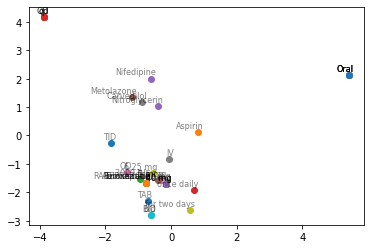

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib notebook

fig = plt.figure()
for i, ent in enumerate(doc.ents):
  x = ent_embedding_low[i,0]
  y = ent_embedding_low[i,1]
  plt.scatter(x,y)
  plt.annotate(str(ent), alpha = 0.5, xy = (x,y), xytext = (5,2),textcoords = 'offset points',ha = 'right',va = 'bottom',size = 8)



---


# Pathology detection from Chest X-ray

---






In [ ]:
!pip install torch==1.1
!pip install torchvision==0.2
!pip install torchsummary
from PIL import *
import PIL.Image
from torchvision import transforms
from torch.autograd import Variable

import torchvision
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# import and load pre-trained checkpoints
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

# model weights - checkpoints
file_id = '1EhalIwMnItsfFj0MnkPB7ahNuiG1Ygz7'
destination = './ckpt' #'gdrive/My Drive/test/ckpt'
download_file_from_google_drive(file_id, destination)
CheckPointData = torch.load(destination,map_location ='cpu')

# model DenseNet121
file_id = '1P9MLVDUsYhQ8Mr7eSmXU-tmPA0BDy8_Z'
destination = './model' #'gdrive/My Drive/test/ckpt'
download_file_from_google_drive(file_id, destination)
weights=torch.load(destination,map_location ='cpu')

model = CheckPointData['model']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(weights['model'])
model = model.to(device)

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torchvision.models.densenet.DenseNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torchvision.models.densenet._DenseBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torchvision.models.densenet._DenseLayer' has changed. you can retrieve the original source code by accessing the object's source 

In [ ]:
PRED_LABEL = [
            'No Finding',
            'Enlarged Cardiomediastinum',
            'Cardiomegaly',
            'Lung Opacity',
            'Lung Lesion',
            'Edema',
            'Consolidation',
            'Pneumonia',
            'Atelectasis',
            'Pneumothorax',
            'Pleural Effusion',
            'Pleural Other',
            'Fracture',
            'Support Devices']

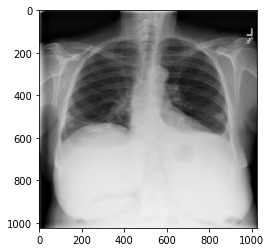

In [ ]:
# load radiology chest x-ray
import matplotlib.pyplot as plt
file_id = '1IADNMSXhRyneBXiDEkWROvWeWle_qwTD'
destination = './00000047_006.png' #'gdrive/My Drive/test/ckpt'
download_file_from_google_drive(file_id, destination)
image = Image.open(destination)
#image = Image.open(path_+'00000047_006.png')
image = image.convert("RGB")
plt.imshow(image)

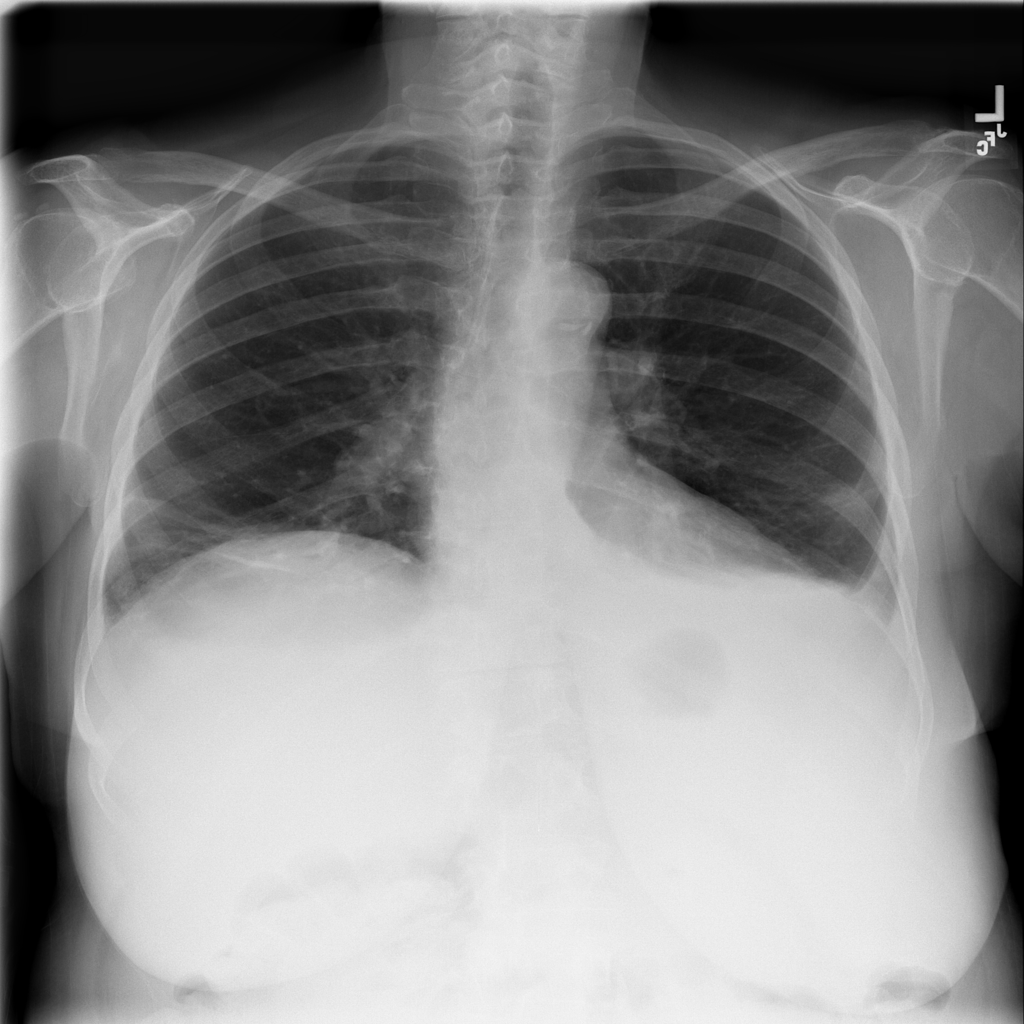

In [ ]:
image

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:155: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


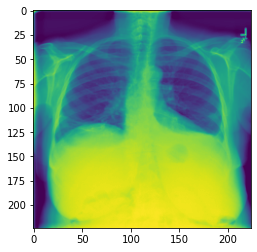

In [ ]:
# transform image, rescale, normalize
transformation = transforms.Compose([
            transforms.Scale(224),
        transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

image_tensor = transformation(image).float()
plt.imshow(image_tensor[0,:,:])
plt.imshow(image_tensor[1,:,:])
plt.imshow(image_tensor[2,:,:])
image_tensor = image_tensor.unsqueeze_(0)

In [ ]:
input = Variable(image_tensor)
input = input.to(device)
output = model(input)
import numpy as np
import pandas as pd
df = pd.DataFrame(index = PRED_LABEL ,columns = ['prob','label'])
df['prob'] = output.cpu().data.numpy()[0]
df['label'] = np.round(output.cpu().data.numpy())[0]
df

,prob,label
No Finding,0.007011,0.0
Enlarged Cardiomediastinum,0.010920,0.0
Cardiomegaly,0.007856,0.0
Lung Opacity,0.369188,0.0
Lung Lesion,0.015889,0.0
Edema,0.014055,0.0
Consolidation,0.068289,0.0
Pneumonia,0.029691,0.0
Atelectasis,0.506422,1.0
Pneumothorax,0.008839,0.0


In [ ]:
from torchsummary import summary
summary(model,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]           8,192
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              ReLU-9          [-1, 128, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          36,864
      BatchNorm2d-11           [-1, 96, 56, 56]             192
             ReLU-12           [-1, 96, 56, 56]               0
           Conv2d-13          [-1, 128, 56, 56]          12,288
      BatchNorm2d-14          [-1, 128,

**some other tools**
https://mlmed.org/tools/xray/

---

